<a href="https://colab.research.google.com/github/zecenbajra55/1100python/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# some unsupervised ml algo
* clustering
** k means, k medoid
** DBSCAN
** hierarchial cluster analysis
* outlier / anomaly detection and novelty detection
** one class SVM
** isolation forest
* visualization and dimensionality reduction
** principal component analysis
** kernel PCA
** locally linear embedding
** t-distributed stochastic neighbour embedding
* association rule learinig
** apriori

# k means clustering
 k = no of clusters and the hyper parameter

k means is sensitive to outliers while k medoid algo is not sensitive to outlier because it uses median

In [ ]:
from sklearn.datasets import load_iris
X, _= load_iris(return_X_y= True, as_frame=True)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


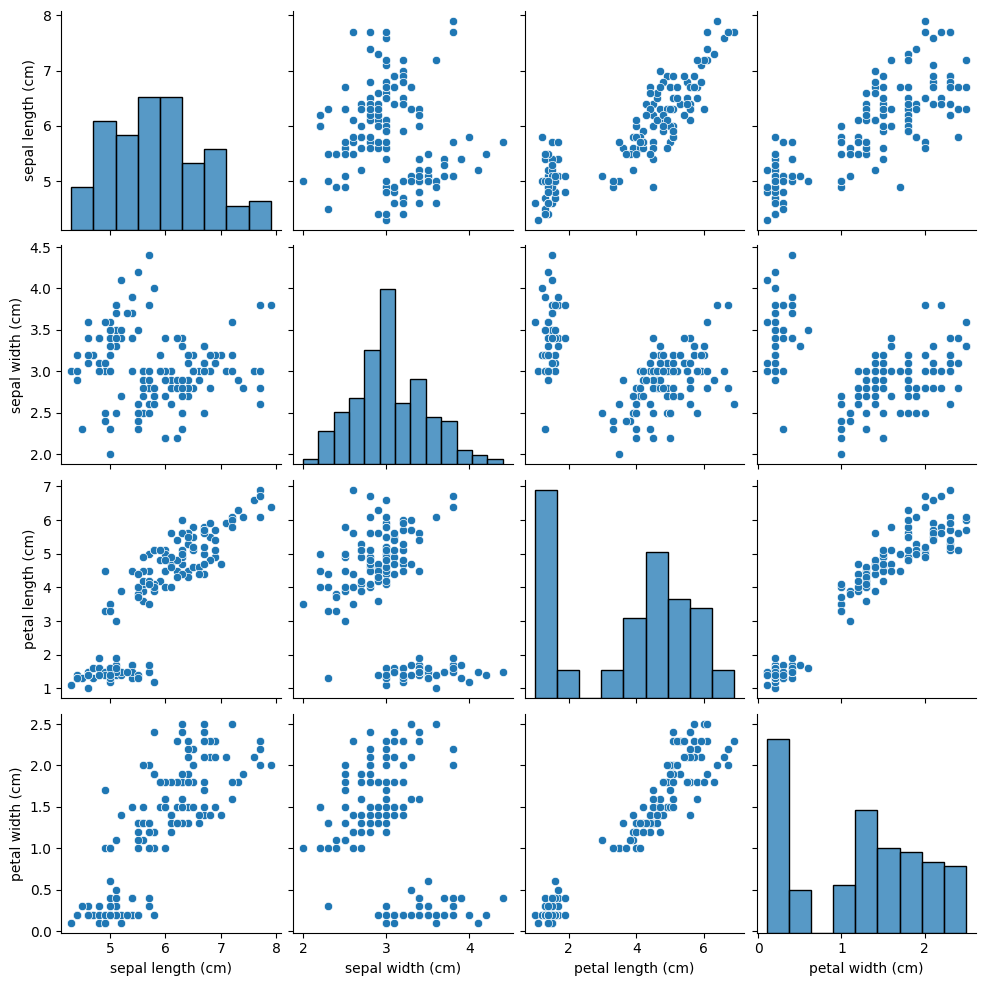

In [ ]:
import seaborn as sns
sns.pairplot(X)

In [ ]:
train_data = X[['petal width (cm)','petal length (cm)']]

In [ ]:
train_data

,petal width (cm),petal length (cm)
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


In [ ]:
from sklearn.cluster import KMeans
cluster = range(1, 10)
sse=[]

In [ ]:
for k in cluster:
    model = KMeans(n_clusters=k, random_state = 40, n_init='auto')
    model.fit(train_data)
    sse.append(model.inertia_)

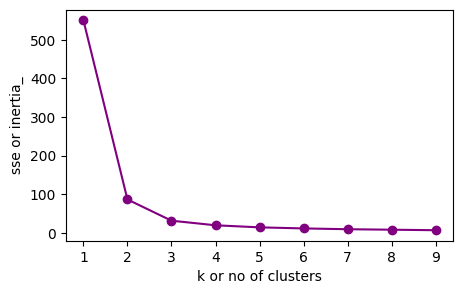

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
plt.plot(cluster, sse, 'o-', color='purple')
plt.xlabel('k or no of clusters')
plt.ylabel('sse or inertia_')
plt.show()

looking in the graph we can say the value of elbow is 3 hence k=3

In [ ]:
k = 3
model = KMeans(n_clusters = k, random_state = 40, n_init='auto')
cluster = model.fit_predict(train_data)

In [ ]:
centroid = model.cluster_centers_
centroid

array([[1.35925926, 4.29259259],
       [0.246     , 1.462     ],
       [2.04782609, 5.62608696]])

In [ ]:
train_data['cluster'] = cluster

<ipython-input-23-5df1c1b5271b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cluster'] = cluster


In [ ]:
train_data.head()

,petal width (cm),petal length (cm),cluster
0,0.2,1.4,1
1,0.2,1.4,1
2,0.2,1.3,1
3,0.2,1.5,1
4,0.2,1.4,1


<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

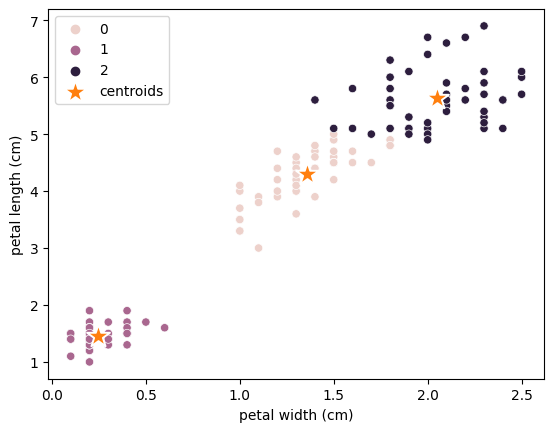

In [ ]:
sns.scatterplot(x='petal width (cm)',y='petal length (cm)',hue = 'cluster',data=train_data)
sns.scatterplot(x=centroid[:,0],y=centroid[:,1],marker='*', s=300, label='centroids')